# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод:**
Из обещей информации видно, что ряд столбцов имеет пропуски и некоторые имеют некорректный тип данных. Названия некоторых столбцов имеют некорректный формат.

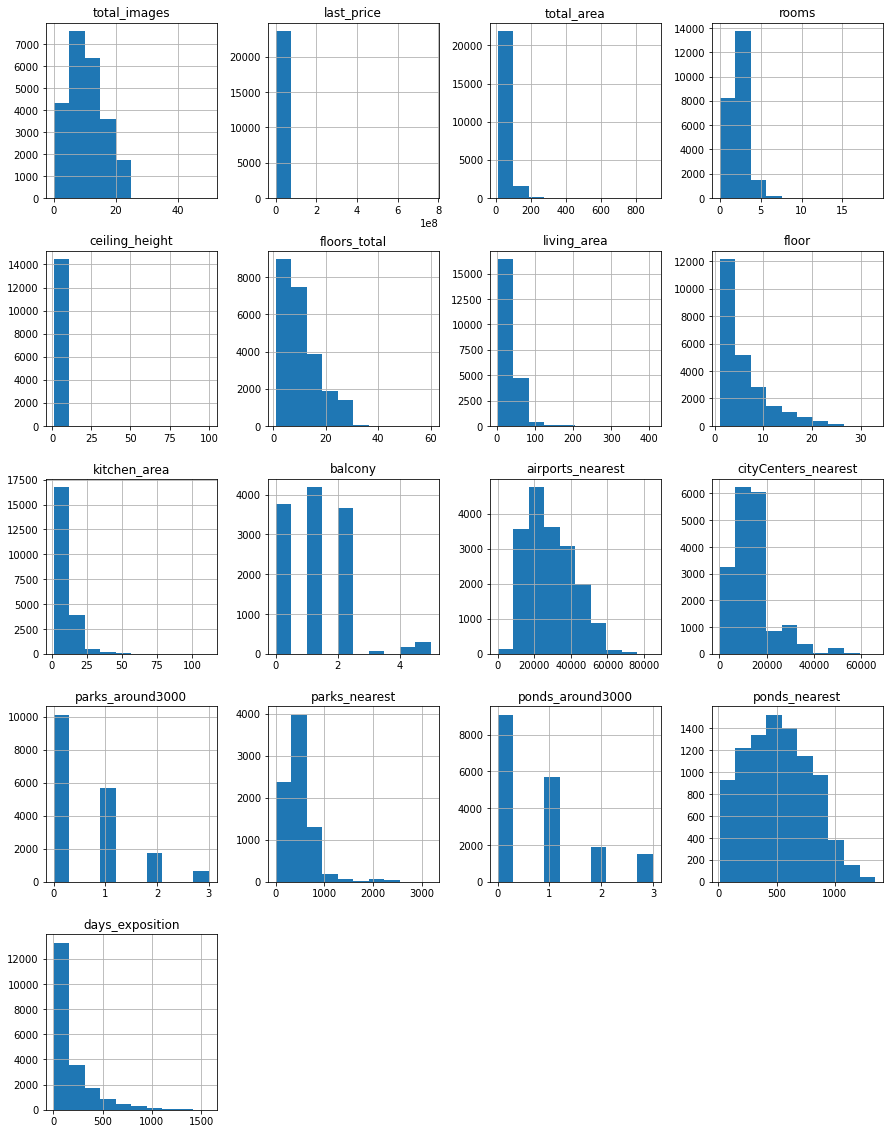

In [ ]:
df.hist(figsize=(15, 20));

**Вывод:**
Гистограммы показывают явное наличие аномальных значений в данных.

### Выполните предобработку данных

In [ ]:
#сразу переименуем столбцы в корректный формат
df.rename(columns = {
    'cityCenters_nearest':'city_centers_nearest',
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000'
    }, inplace = True )

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Решим проблему пропусков и ошибок в столбцах по порядку, там где возможно.

**ceiling_height** - высота потолков.  
Выведем уникальные значения высоты потолков

In [ ]:
df['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   6.  ,   5.8 ,   5.6 ,
         5.5 ,   5.3 ,   5.2 ,   5.  ,   4.9 ,   4.8 ,   4.7 ,   4.65,
         4.5 ,   4.45,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,   4.19,
         4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,   3.93,
         3.9 ,   3.88,   3.87,   3.86,   3.85,   3.84,   3.83,   3.82,
         3.8 ,   3.78,   3.76,   3.75,   3.7 ,   3.69,   3.68,   3.67,
         3.66,   3.65,   3.63,   3.62,   3.6 ,   3.59,   3.58,   3.57,
         3.56,   3.55,   3.54,   3.53,   3.52,   3.51,   3.5 ,   3.49,
         3.48,   3.47,   3.46,   3.45,   3.44,   3.43,   3.42,   3.4 ,
         3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,   3.32,
         3.31,   3.3 ,   3.29,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
      

Помимо большого числа пропусков видим неправдоподобно большие и маленькие значения. Которые скорее всего появились из-за ошибок с раположением запятых.

In [ ]:
#исправим неправдободобные значения
df.loc[df['ceiling_height'] > 20.0, 'ceiling_height'] = df['ceiling_height']/10
df.loc[df['ceiling_height'] < 2.2, 'ceiling_height'] = df['ceiling_height']*10

<u>Недостающие значения заменим на медианные, в случае с потолками наиболее подходящий выбор</u>

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

**floors_total** - всего этажей в доме.  
Так как, количество строчек с пропусками в этом столбце ничтожно мало, эти данные не смогут сильно повлиять на конечный результат.  
<u>Уберем эти строки.</u>

In [ ]:
df = df.dropna(subset=['floors_total'])

**living_area** - жилая площадь.  
Посчитаем процент числа пропусков от общего количества объектов в базе.  

In [ ]:
print('{:.2%}'.format(df['living_area'].isna().sum() / df['living_area'].count()))

8.60%


Пропуски, вероятно, совершены по причине того, что некоторые пользователи не посчитали эту информацию важной, т. к. её просто вычеслить отняв от общей площади площадь кухни, кладовых балконов. Мы же видим, что число пропусков менее 9% от общего количества объектов в базе. Можно сделать вывод, что отсутствие этих данных не сильно изменит общую картину.  
<u>Следовательно можно убрать эти строки.</u>

In [ ]:
df = df.dropna(subset=['living_area'])

**is_apartment** - аппартаменты.  
Посчитаем процент аппартаментов.

In [ ]:
print('{:.0%}'.format(df['is_apartment'].mean()))

2%


Процент хоть и мал, но близок к действительности. Предположим, что при заполнении квартиры не являющеся аппартаментами попросту не отмечали. <u>Следовательно имеет смысл заменить пропуски на "False".</u>

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)

**kitchen_area** - площадь кухни.  
Изучим зависимость площади кухни других показателей. Используем коэффициент корреляции Пирсона.

In [ ]:
df.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area']

kitchen_area            1.000000
total_area              0.609457
last_price              0.517690
living_area             0.428768
rooms                   0.269760
floors_total            0.168433
ceiling_height          0.153383
ponds_around_3000       0.146896
floor                   0.139055
total_images            0.111256
days_exposition         0.102312
balcony                 0.094941
parks_around_3000       0.088910
is_apartment            0.041336
parks_nearest           0.030918
airports_nearest        0.006781
ponds_nearest          -0.100715
city_centers_nearest   -0.189580
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64

Самые близкие зависимости имеем с общей площадью и ценой, но зависимость неявная. Сделаем предположение, что в квартирах с пропусками отсутствует кухня. Как пример, в студиях или комнатах в общежитии нет кухонь, как таковых.  
<u>Следовательно нужно заменить пропуски на 0.</u>

In [ ]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

**balcony** - число балконов.  
Проведем аналогичное исследование.

In [ ]:
df.corr().sort_values(by='balcony', ascending=False)['balcony']

balcony                 1.000000
floors_total            0.199123
floor                   0.176230
total_images            0.118912
kitchen_area            0.099247
airports_nearest        0.063377
parks_nearest           0.053048
total_area              0.053014
city_centers_nearest    0.052210
is_apartment            0.046280
last_price              0.035759
studio                  0.032244
open_plan               0.020253
rooms                   0.020144
living_area             0.019864
ponds_nearest           0.017377
ceiling_height          0.001491
days_exposition        -0.034585
ponds_around_3000      -0.043261
parks_around_3000      -0.082639
Name: balcony, dtype: float64

Здесь видим отсутствие даже близких зависимостей. Вероятно балконов попросту нет и их не отмечали.  
<u>Следовательно нужно заменить пропуски на 0.</u>

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

**locality_name** — название населённого пункта.  
Посмотрим на уникальные значения в списке.

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Из данных видно, что помимо пропусков имеются и неявные дубликаты.  
Избавимся от них, убрав типы населенных пунктов оставив лишь их названия.  
<u>Пропущеные значения заменим на 'unknown'.</u>

In [ ]:
df['locality_name'] = df['locality_name'].str.lower() #приведем все в один регистр

#уберем типы населенных пунктов
df['locality_name'] = (
    df['locality_name']
    .replace(['посёлок ', 'поселок ', 'при железнодорожной станции ', 'платформа ',
              'садоводческое некоммерческое товарищество ', 'садовое товарищество ',
              'станции ', 'село ', 'пансионат ', 'городского типа ', 'деревня ',
              'городской посёлок ', 'городской поселок ', 'городской ', ' '], '', regex=True)
)
#заменим пропуски
df['locality_name'] = df['locality_name'].fillna('unknown')

df['locality_name'].sort_values().unique()

array(['69-йкилометр', 'unknown', 'агалатово', 'александровская',
       'алексеевка', 'аннино', 'аро', 'барышево', 'батово', 'бегуницы',
       'белогорка', 'белоостров', 'бокситогорск', 'большаявруда',
       'большаяижора', 'большаяпустомержа', 'большиеколпаны',
       'большоерейзино', 'большойсабск', 'бор', 'борисовагрива', 'бугры',
       'будогощь', 'ваганово', 'важины', 'вартемяги', 'вещево', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружнаягорка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зелёныйбор', 'зимитицы', 'ива

Следующие столбцы:  
  **airports_nearest** — расстояние до ближайшего аэропорта  
  **citycenters_nearest** — расстояние до центра города  
  **parks_nearest** — расстояние до ближайшего парка  
  **ponds_nearest** — расстояние до ближайшего водоёма  
  Имеют схожие причины пропусков, предположительно, заключающиеся в отсутствии конечной точки, будь то аэропорт, центр города (объект недвижимости может находится не в городе), парк или водоем. Либо же по причине их большого удаления от объекта.  
  
  <u>В таком случае имеет смысл оставить зчения неизменными.</u>

Столбцы:  
  **parks_around_3000** — число парков в радиусе 3 км  
**ponds_around_3000** — число парков в радиусе 3 км  
Так же имеют пропуски по одной причине, вероятнее всего, она заключается в отсутствии водоемов и парков в искомом радиусе.  
  
  <u>Следовательно имеет смысл заменить пропуски на 0.</u>

In [ ]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

**days_exposition** - сколько дней было размещено объявление (от публикации до снятия)
Очевидно, что объекты недвижимости с пропусками ещё не проданы.  
<u>Оставляем данные без изменений</u>

In [ ]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4913
city_centers_nearest     4892
parks_around_3000           0
parks_nearest           14262
ponds_around_3000           0
ponds_nearest           13360
days_exposition          2977
dtype: int64

**Вывод:**  
Основными причинами пропусков могли послужить: человеческий фактор, сбои в работе ПО, некоторые недоработки ПО (к примеру, is_apartment можно заполнять по умолчанию значениями False, а для апартаментов поставить отметку возвращающую True)

#### Теперь разберемся с некорректными типами данных.

In [ ]:
df.info() #ещё раз выведем информацию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21743 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21743 non-null  int64  
 1   last_price            21743 non-null  float64
 2   total_area            21743 non-null  float64
 3   first_day_exposition  21743 non-null  object 
 4   rooms                 21743 non-null  int64  
 5   ceiling_height        21743 non-null  float64
 6   floors_total          21743 non-null  float64
 7   living_area           21743 non-null  float64
 8   floor                 21743 non-null  int64  
 9   is_apartment          21743 non-null  bool   
 10  studio                21743 non-null  bool   
 11  open_plan             21743 non-null  bool   
 12  kitchen_area          21743 non-null  float64
 13  balcony               21743 non-null  float64
 14  locality_name         21743 non-null  object 
 15  airports_nearest   

**last_price** следует заменить на int, так как цены заполнены целыми числами.  
**first_day_exposition** здесь записаны даты, по этому следует заменить на datetime.  
**floors_total, balcony, parks_around_3000, ponds_around_3000** это все данные отражающие количество чего либо, имеет смысл изменить тип данных на int.  

In [ ]:
#изменим тип даных для столбцов с целыми числами
df = df.astype({
    'last_price': 'int',
    'floors_total' : 'int',
    'balcony' : 'int',
    'parks_around_3000' : 'int',
    'ponds_around_3000' : 'int'
})

In [ ]:
#преобразуем столбец first_day_exposition в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21743 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21743 non-null  int64         
 1   last_price            21743 non-null  int64         
 2   total_area            21743 non-null  float64       
 3   first_day_exposition  21743 non-null  datetime64[ns]
 4   rooms                 21743 non-null  int64         
 5   ceiling_height        21743 non-null  float64       
 6   floors_total          21743 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 21743 non-null  int64         
 9   is_apartment          21743 non-null  bool          
 10  studio                21743 non-null  bool          
 11  open_plan             21743 non-null  bool          
 12  kitchen_area          21743 non-null  float64       
 13  balcony         

In [ ]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,8.50,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,6.00,1,ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0


Как видим из таблицы нужные пропуски заполнены названия столбцов соответствуют "змеиному регистру", столбец с датой отображается корректно.

In [ ]:
print('Явных дубликатов', df.duplicated().sum())

Явных дубликатов 0


**Вывод:**  
Иходные данные были некорректны, для правильной работы и получения корректных данных мы обработали их в соответствии со следующими пунктами:  
Переименованы названия столбцов с переходом к "змеиному регистру".  
Проведеная работу с явными пропусками в таблице, обработаны ошибки в данных.  
Изменен тип данных, в соответствии с данными находящимися в столбцах.  
  
Данные готовы к исследованию и следующими за ними выводами.

### Добавьте в таблицу новые столбцы

Добавим столбец **price_square_meter** с ценой одного квадратного метра

In [ ]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).round(2)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79


Добавим столбец **weekday_publication** с днем недели публикации

In [ ]:
df['weekday_publication'] = df['first_day_exposition'].dt.weekday
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0


Добавим столбец **month_publication** c месяцем публикации

In [ ]:
df['month_publication'] = df['first_day_exposition'].dt.month
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_publication,month_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,0,9


Добавим столбец **year_publication** c годом публикации

In [ ]:
df['year_publication'] = df['first_day_exposition'].dt.year
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_publication,month_publication,year_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,0,NaN,55.0,95065.79,0,9,2018


Добавим столбец **type_floor** с типом этажа квартиры

In [ ]:
def type_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['type_floor'] = df.apply(type_floor, axis=1)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_publication,month_publication,year_publication,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,NaN,0,NaN,55.0,95065.79,0,9,2018,другой


In [ ]:
df['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Функция работает мы получили новый столбец с новой метрикой.

Добавим столбец **city_centers_nearest_km** с расстоянием до центра города в километрах

In [ ]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round(0)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,weekday_publication,month_publication,year_publication,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

Изучим зависимость количества квартир в продаже в зависимости от разных параметров

#### Общая площадь

In [ ]:
df['total_area'].describe()#выведем данные диаграммы размаха

count    21743.000000
mean        60.075015
std         34.685768
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

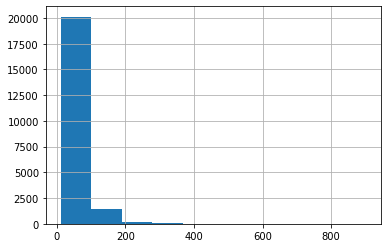

In [ ]:
df['total_area'].hist() #построим гистограмму

Для более детального рассмотрения отсечем объекты с площадью больше 100 и разобьем на 50 корзин

<AxesSubplot:>

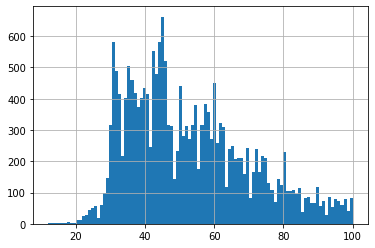

In [ ]:
df['total_area'].hist(bins=100, range=(12,100))

In [ ]:
df['total_area'].apply(lambda x: 30 <= x <= 70).sum()

15898

**Вывод:**
Из гистограммы видно, что самыми популярными являются объекты площадью от 30 до 70 кв. метров с пиком около 45 кв. метров. Их общее количество 15898, что блоее 2/3 от общего числа объектов.  
Распределение близко к нормальному, аномалий нет.

#### Жилая площадь

In [ ]:
df['living_area'].describe()#выведем данные диаграммы размаха

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

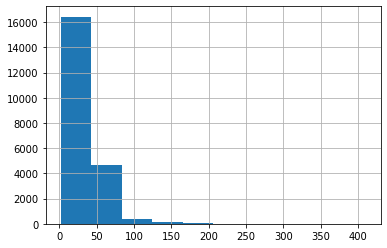

In [ ]:
df['living_area'].hist() #построим гистограмму

<AxesSubplot:>

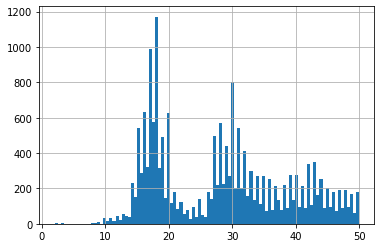

In [ ]:
df['living_area'].hist(bins=100, range=(2,50))

In [ ]:
df['living_area'].apply(lambda x: 15 <= x <= 42).sum()

15535

**Вывод:** Из гистограммы видно, что самыми популярными являются объекты с жилой площадью от 15 до 42 кв. м. с пиком около 18 кв. м., но при этом наблюдается явный спад в объектах с площадью 23-25 кв. м.. Их общее количество 15535, что блоее 2/3 от общего числа объектов.

#### Площадь кухни

In [ ]:
df['kitchen_area'].describe()#выведем данные диаграммы размаха

count    21743.000000
mean        10.124351
std          6.065422
min          0.000000
25%          7.000000
50%          9.000000
75%         11.700000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

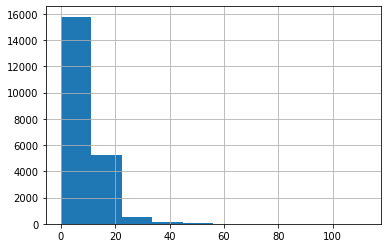

In [ ]:
df['kitchen_area'].hist()

<AxesSubplot:>

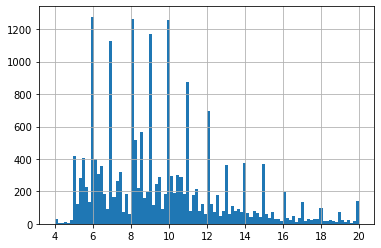

In [ ]:
#не возьмем в расчет кухни 0 кв. м., т. к. скорее всего в этих объектах нет кухонь
df['kitchen_area'].hist(bins=100, range=(4,20))

In [ ]:
df['kitchen_area'].apply(lambda x: 6 <= x <= 12).sum()

14586

**Вывод:** Можем заметить явные всплески по целым числам, скорее всего это связо с тем что большое колличество пользователей не уточняют площадь кухни останавливаясь на целом значении. Самыми популярными являются от 6 до 12 кв. м.. Их количество 14586, что около 2/3 от общего числа объектов

#### Цена продажи

In [ ]:
df['last_price'].describe()#выведем данные диаграммы размаха

count    2.174300e+04
mean     6.500107e+06
std      1.087568e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

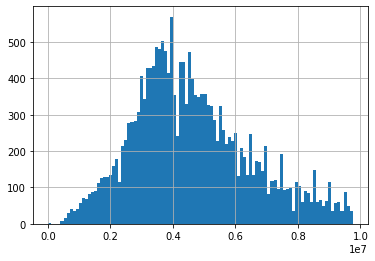

In [ ]:
df['last_price'].hist(bins=100, range=(1.219000e+04,9.750000e+06))

In [ ]:
df['last_price'].apply(lambda x: 3e+06 <= x <= 5e+06).sum()

8788

**Вывод:** Из гистограммы видно, что самыми популярными являются объекты с ценой продажи в диапозоне от 3 до 5 млн.. Их общее количество 8788, что составняет около 40% от общего числа объектов.

#### Количество комнат

Так как данные о размахе не имеют смысла посчитаем n-комнатные квартиры

In [ ]:
df['rooms'].value_counts()

1     7368
2     7279
3     5353
4     1087
5      292
0      183
6       98
7       53
8       12
9        7
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Отбросим все квартиры более 7 комнат и построим гистограмму

<AxesSubplot:>

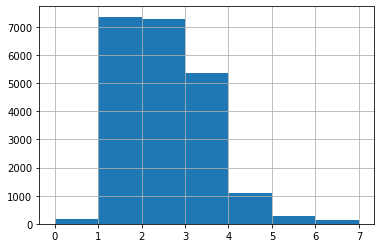

In [ ]:
df['rooms'].hist(bins=7, range=(0,7))

**Вывод:** Больше всего однокомнатных и двухкомнатных объектов. Увеличение количества комнат ведет за собой снижение предложений по кривой убывающей геометрической прогресии.

#### Высота потолков

In [ ]:
df['ceiling_height'].describe()

count    21743.000000
mean         2.709639
std          0.468574
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

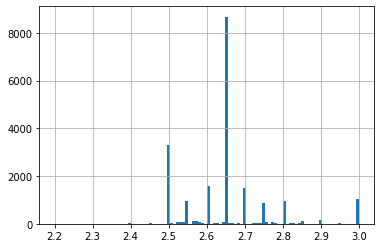

In [ ]:
df['ceiling_height'].hist(bins=100, range=(2.2,3))

**Вывод:** Наиболее распространены потолки 2,65 м..

#### Тип этажа квартиры

In [ ]:
(
df.pivot_table(index='type_floor', values='last_price', aggfunc='median')
.sort_values(by='last_price', ascending=False).rename(columns={'last_price' : 'Медианная цена'})
)

,Медианная цена
type_floor,
другой,4850000
последний,4350000
первый,3950000


<AxesSubplot:>

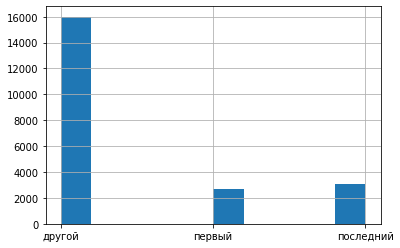

In [ ]:
df['type_floor'].hist()

**Вывод:** Из медианной цены видно, что "первый" этаж менее ценен для покупателей, чем "последний", но и тот в свою очередь менее ценен чем "другие" этажи.
Гистограмма показывает, что на общее количество предложений "Первого" и "Последнего" этажа приходится четверть общего количества объектов, следовательно люди хотят сьехать с этих этажей.

#### Общее количество этажей в доме

<AxesSubplot:>

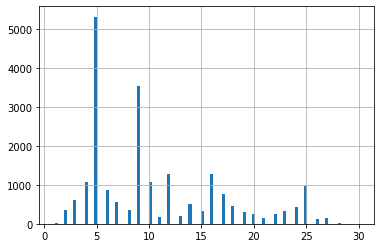

In [ ]:
df['floors_total'].hist(bins=100, range=(1,30))

**Вывод:** Больше всего предложений в пятиэтажных домах, а потом в девятиэтажках, что может говорить о преимуществе старого жилого фонда в продаже.

#### Расстояние до центра города в метрах

In [ ]:
df['city_centers_nearest'].describe()

count    16851.000000
mean     14229.629399
std       8669.278529
min        181.000000
25%       9289.000000
50%      13105.000000
75%      16268.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

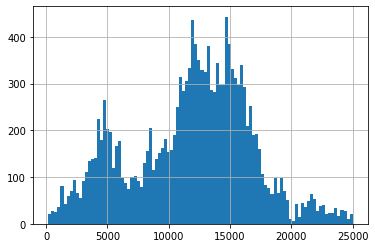

In [ ]:
df['city_centers_nearest'].hist(bins=100, range=(181,25000))

In [ ]:
df['city_centers_nearest'].apply(lambda x: 12000 <= x <= 17000).sum()

6463

In [ ]:
df['city_centers_nearest'].apply(lambda x: 4000 <= x <= 6000).sum()

1519

**Вывод:** Видим, что наибольшей популярностью пользуются спальные района окраин города и пригорода, с удалением от центра от 12 до 13 км. Так же имеется значительный всплекс имеется на растоянии 5 км.

#### Расстояние до центра города в метрах

In [ ]:
df['parks_nearest'].describe()

count    7481.000000
mean      488.122845
std       337.968054
min         1.000000
25%       287.000000
50%       452.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

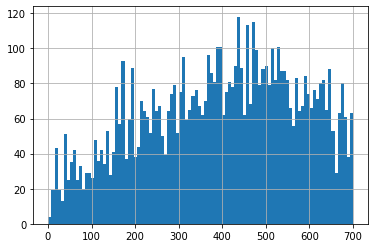

In [ ]:
df['parks_nearest'].hist(bins=100, range=(1,700))

**Вывод:** Количество предложений не сильно зависит от удаленности парка.

#### Общий вывод:

Подводя итог, исходя из изученных данных, составим среднестатистический портрет объекта недвижимости в продаже:  
    квартира в пяти или девятиэтажном доме площадью около 45 кв. м., кухней от 6 до 12 кв. м., потолками 2,65 м., чаще всего одно или двухкомнатная на окраинах и ценовом диапазоне от 3 до 5 млн.

### Изучаем, как быстро продавались квартиры

In [ ]:
df['days_exposition'].describe()#для анализа используем данные из диаграммы размаха

count    18766.000000
mean       184.903922
std        221.329931
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

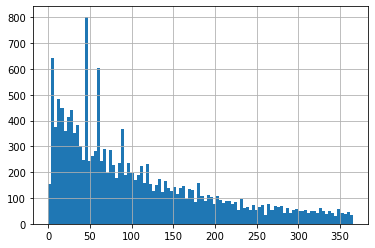

In [ ]:
df['days_exposition'].hist(bins=100, range=(0,365))

**Вывод:**  

В среднем квартиры продаются за 184 дня, но при этом медианное значение 101 день, оно точнее характеризует среднее время продажи, так как не зависит от выбросов и аномальных значений.  
    
Быстрыми продажами будут продажи в течении первого квартиля за 44 дня, а длительные продажи от 239 дней, после третьего квартиля.
    
В среднем продажа квартиры занимает около 3 месяцев, в зависимотсти от сопутствующих факторов (площади, цены, удалённости от центра, этажа), все что дольше, скорее всего, сильно выбивается из портрета среднестатистическойй квартиры или имеет какие-то отталкивающие факторы (к примеру, большая удаленность от центра).

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

Изучим зависимость цены **last_price** от столбцов с числовыми данными:

**total_area** - общая площадь  
**living_area** - жилая площадь  
**kitchen_area** - площадь кухни  
**rooms** - количество комнат    
  
  Построим для каждого столбца диаграмму рассеивания.

<AxesSubplot:xlabel='rooms'>

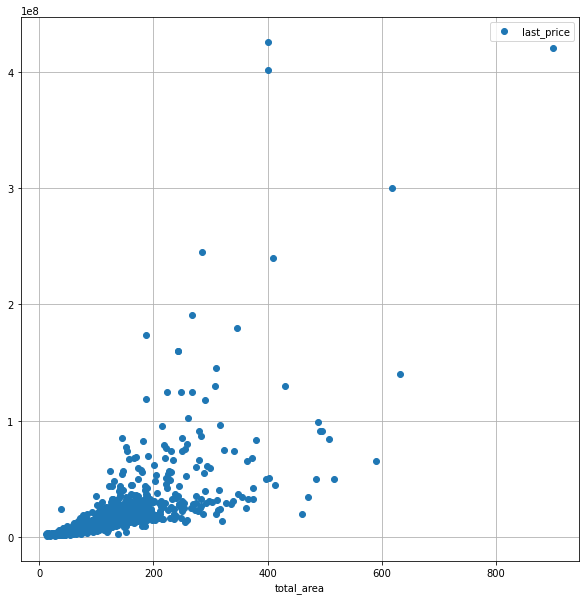

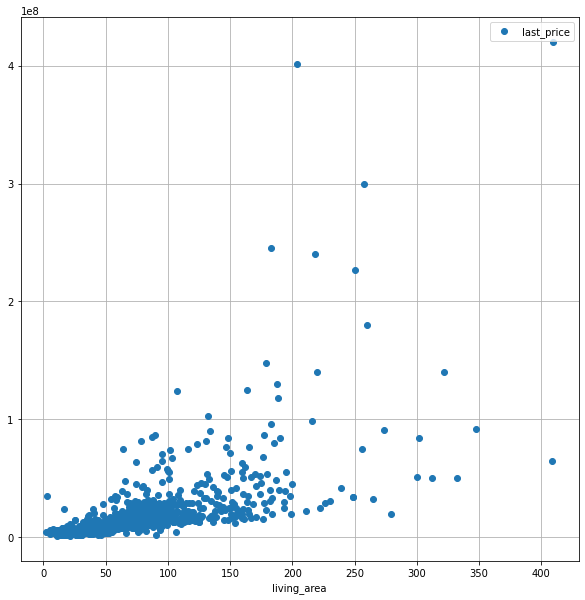

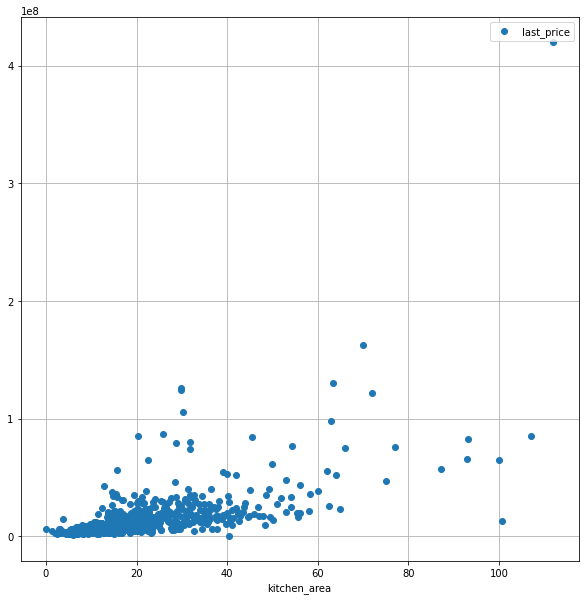

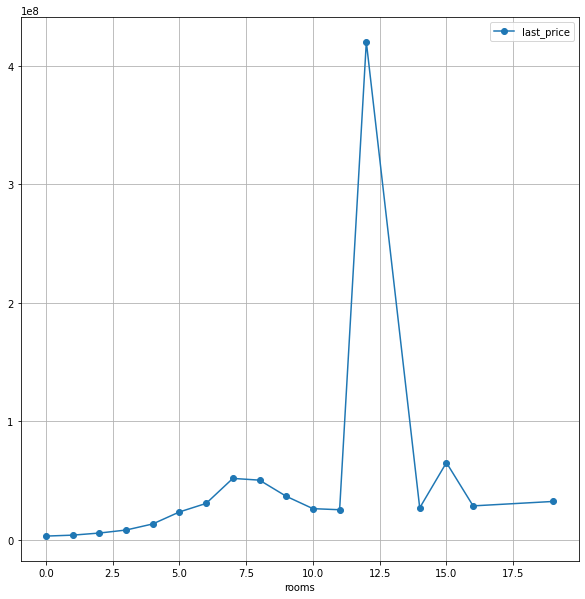

In [ ]:
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

df.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))

Полученые графики неинфомативны, искажения получаются из-за редких и выбивающихся значений.  
Обработаем данные убрав выбивающиеся значения. Для этого из данных иследования сделаем срезы данных сдвинув границы ращмаха приблизительно на один размах.

In [ ]:
cut_df_total_area = df.query('last_price <= 10e+06 and 10.5 <= total_area <= 99')
cut_df_living_area = df.query('last_price <= 10e+06 and living_area <= 66')
cut_df_kitchen_area = df.query('last_price <= 10e+06 and 2.3 <= kitchen_area <= 16.4 ')
cut_df_rooms = df.query('last_price <= 10e+06 and rooms <=7')

Теперь построим по обработанным данным новые диаграмамы рассеивания

<AxesSubplot:xlabel='rooms'>

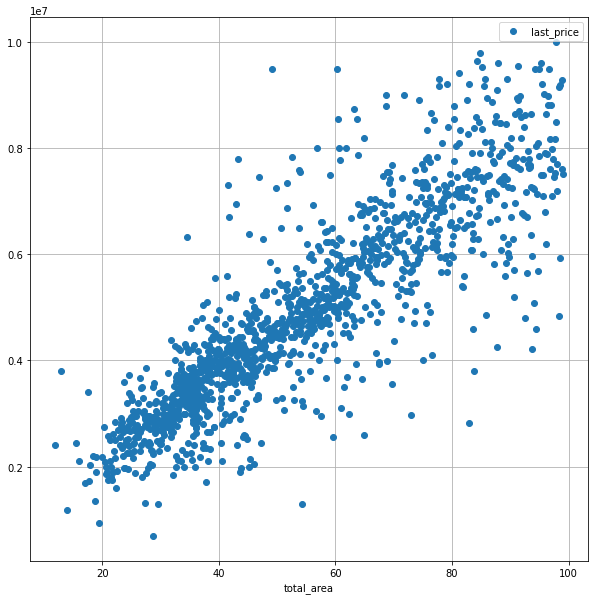

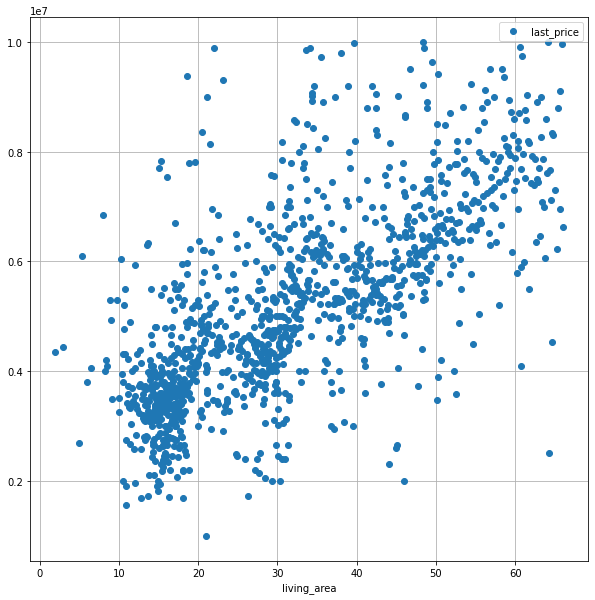

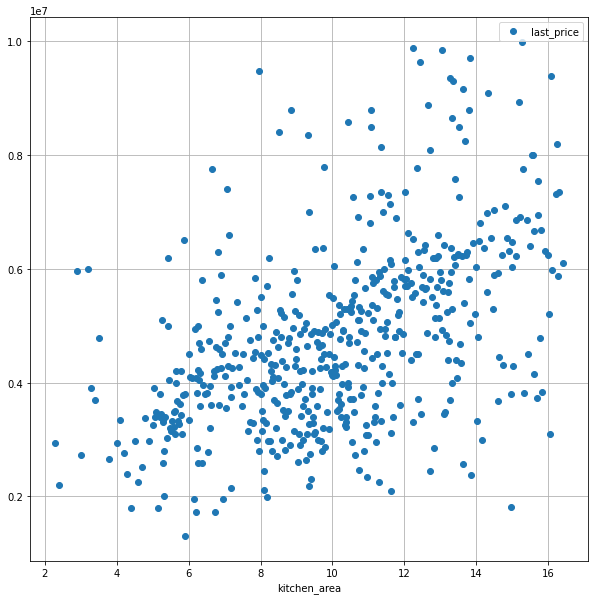

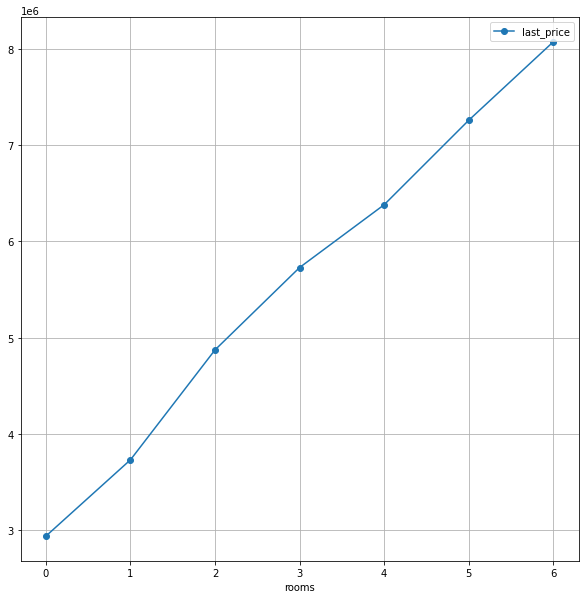

In [ ]:
cut_df_total_area.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

cut_df_living_area.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

cut_df_kitchen_area.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10))

cut_df_rooms.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))

In [ ]:
df.corr().sort_values(by='last_price', ascending=False).head(6)['last_price']

last_price            1.000000
price_square_meter    0.747618
total_area            0.641412
living_area           0.566396
kitchen_area          0.424345
rooms                 0.361064
Name: last_price, dtype: float64

Из графиков заметно, что чем больше общая площадь, тем выше стоимость. Чуть хуже зависимость стоимости от жилой площади. Площадь кухни же почти не коррелирует с ценой. Что подтверждает таблица корреляции Пирсона, самый высокий коэффициет корреляции имеет общая площадь, самая низкая зависимость у площади кухни.

Теперь изучим зависимость цены от типа этажа - **type_floor**

<AxesSubplot:xlabel='type_floor'>

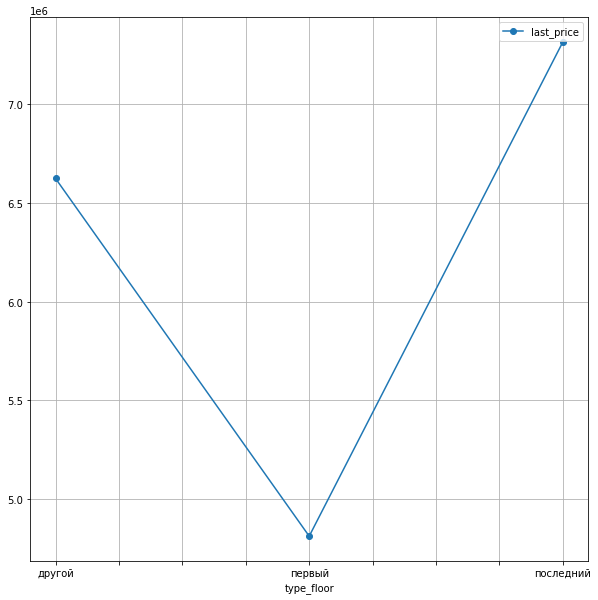

In [ ]:
df.pivot_table(index='type_floor', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))

Исследуем зависимость цены от календарных параметров:  
  
**weekday_publication** - день недели публикации  
**month_publication** - месяц публикации  
**year_publication** - год публикации

<AxesSubplot:xlabel='year_publication'>

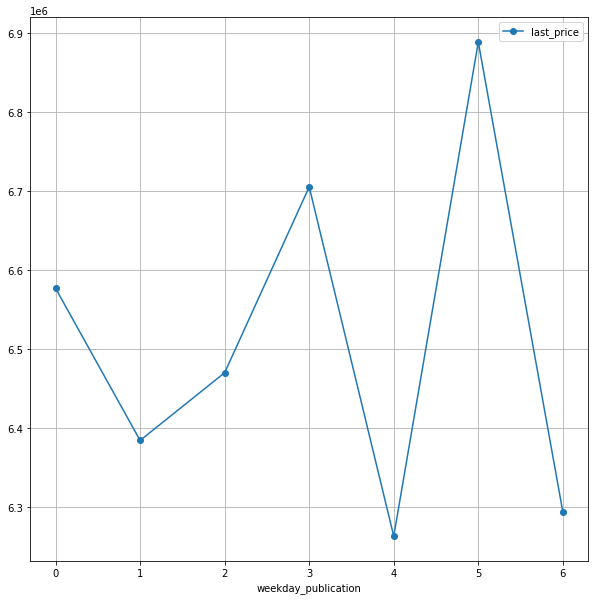

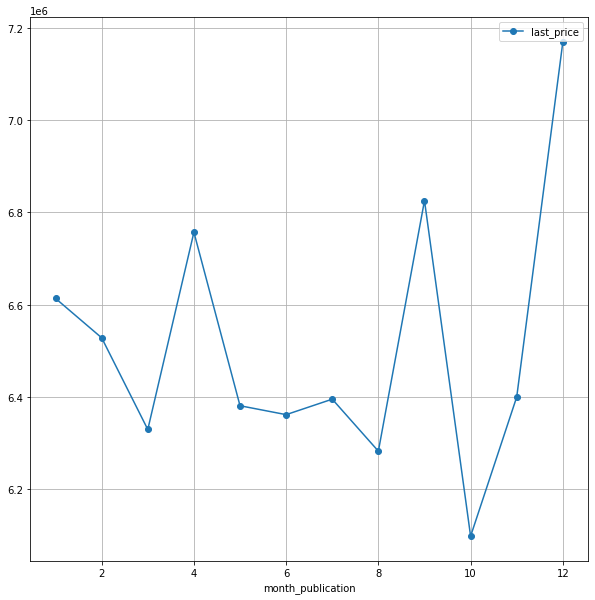

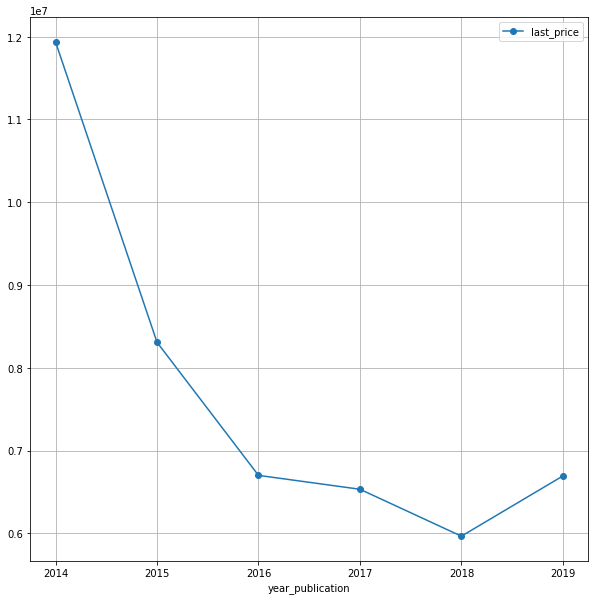

In [ ]:
df.pivot_table(index='weekday_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
df.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))
df.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 10))

**Вывод:**  

Чем больше общая площадь, тем выше стоимость. Чуть хуже зависимость стоимости от жилой площади. Площадь кухни же почти не коррелирует с ценой.

Число комнат, в основной массе, влияет на цену, тем больше комнат тем выше цена.

Первый этаж влияет на стоимость, квартиры на первом этаже значительно дешевле. Последний этаж имеет наибольшую стоимость. Стоимость у квартир, расположенных на "другом" этаже, ближе к средней стоимости.  
  
День недели и месяц публикации не имеют никакой зависимости с ценой. Год публикации же показывает, что 2015 и 2014 года стоимость сильно снижалась.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
#посчитаем количество квартир в каждом населенном пункте
count_in_location = df.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
count_in_location.columns = ['count']
#присвоим значение 10 населённых пунктов с наибольшим числом объявлений переменной top_10
top_10 = count_in_location.sort_values(by='count', ascending=False).head(10).rename(columns={'count':'Количество квартир'})
top_10

,Количество квартир
locality_name,
санкт-петербург,14534
мурино,524
кудрово,422
шушары,403
всеволожск,371
пушкин,345
колпино,328
парголово,301
гатчина,292


In [ ]:
top_10['Цена за квадратный метр'] = df.pivot_table(index='locality_name', values='price_square_meter').round(2)
top_10

,Количество квартир,Цена за квадратный метр
locality_name,,
санкт-петербург,14534,114232.32
мурино,524,86664.72
кудрово,422,95646.50
шушары,403,78749.64
всеволожск,371,68880.13
пушкин,345,103428.48
колпино,328,75344.10
парголово,301,90442.59
гатчина,292,68627.36


Отсортируем данные чтобы выделить среди 10 самых популярных населенных пунктов самый дешевый квадратный метр и самый дорогой

In [ ]:
top_10.sort_values(by='Цена за квадратный метр', ascending=False)

,Количество квартир,Цена за квадратный метр
locality_name,,
санкт-петербург,14534,114232.32
пушкин,345,103428.48
кудрово,422,95646.50
парголово,301,90442.59
мурино,524,86664.72
петергоф,197,84480.97
шушары,403,78749.64
колпино,328,75344.10
всеволожск,371,68880.13


**Вывод:**  
Как и ожидалось самый догорогой квадратный метр в Санкт-Петебурге, самый же дешевый оказался в Гатчине, но при этом Всеволжск отличается на ничтожный минимум.

### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [ ]:
#выведем данные по Санкт-Петербургу
df.query('locality_name == "санкт-петербург"')['city_centers_nearest_km'].describe()

count    14489.000000
mean        11.582373
std          4.824258
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

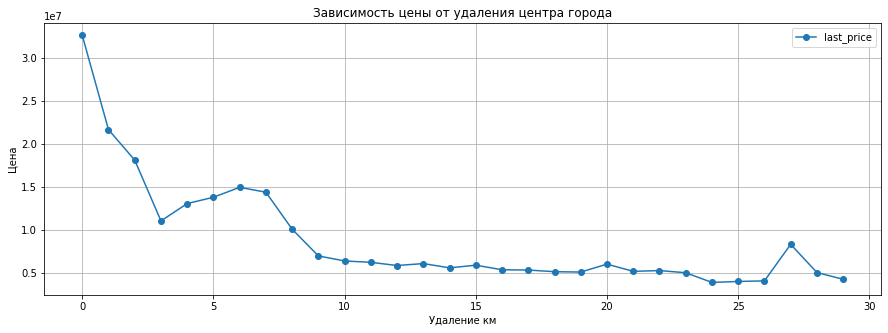

In [ ]:
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('Зависимость цены от удаления центра города')
plt.ylabel('Цена')
plt.xlabel('Удаление км')
plt.show()

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург

In [ ]:
(
df.query('locality_name == "санкт-петербург" and city_centers_nearest_km<20')
.pivot_table(values='last_price', index='city_centers_nearest_km')
)

,last_price
city_centers_nearest_km,
0.0,3.259276e+07
1.0,2.163171e+07
2.0,1.809620e+07
3.0,1.102326e+07
4.0,1.304011e+07
5.0,1.377230e+07
6.0,1.492848e+07
7.0,1.435907e+07
8.0,1.006175e+07


**Вывод:**

Самые дорогие квартиры в самом центре города в радиусе 2 км, далее цены держаться выше среднего на расстоянии от центра города до 8 километров, и затем стоимость не сильно зависит от удаления и близка средним значениям.

### Общий вывод

В процессе исследования объявлений о продаже квартир были сделаны следующие выводы и предприняты следующие действия:  

Была выполнена предобработка данных:  
* Переименованы название столбцов с переходом к "змеиному регистру".
* Провели работу с явными пропусками в таблице, обработали ошибки в данных.
* Изменили тип данных, в соответствии с данными находящимися в столбцах.
* Сделали вывод о причинах появления пропусков: человеческий фактор, сбои в работе ПО, некоторые недоработки ПО.

Добавлены новые столбцы в таблицу для проведения следующего этапа:
* price_square_meter - цена квадратного метра объекта.
* day_publication - день недели публикации объявления.
* month_publication - месяц публикации объявления.
* year_publication - год публикации объявления.
* type_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
* city_centers_nearest_km - расстояние до центра города в километрах.
  
Проведен исследовательский анализ данных

* Изучены и описаны параметры:  
    
    *Среднестатистический портрет объекта недвижимости в продаже - квартира в пяти или девятиэтажном доме площадью около 45 кв. м., кухней от 6 до 12 кв. м., потолками 2,65 м., чаще всего одно или двухкомнатная на окраинах и ценовом диапазоне от 3 до 5 млн.
  
  
* Изучено, как быстро продавались квартиры:  
    
    *В среднем квартиры продаются за 184 дня, но при этом медианное значение 101 день, оно точнее характеризует среднее время продажи, так как не зависит от выбросов и аномальных значений.  
    
    *Быстрыми продажами будут продажи в течении первого квартиля за 44 дня, а длительные продажи от 239 дней, после третьего квартиля.    
    
    *В среднем продажа квартиры занимает около 3 месяцев, в зависимотсти от сопутствующих факторов (площади, цены, удалённости от центра, этажа), все что дольше, скорее всего, сильно выбивается из портрета среднестатистическойй квартиры или имеет какие-то отталкивающие факторы (к примеру, большая удаленность от центра).*
  
  
* Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта:  
    
    *Чем больше общая площадь, тем выше стоимость. Чуть хуже зависимость стоимости от жилой площади. Площадь кухни же почти не коррелирует с ценой.*
    
    *Число комнат, в основной массе, влияет на цену, тем больше комнат тем выше цена.*
    
    *Первый этаж влияет на стоимость, квартиры на первом этаже значительно дешевле. Последний этаж имеет наибольшую стоимость. Стоимость у квартир, расположенных на "другом" этаже, ближе к средней стоимости.*
    
    *День недели и месяц публикации не имеют никакой зависимости с ценой. Год публикации же показывает, что 2015 и 2014 года стоимость сильно снижалась.*  
    
    
* Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:  
    
    *Как и ожидалось самый догорогой квадратный метр в Санкт-Петебурге, самый же дешевый оказался в Гатчине, но при этом Всеволжск отличается на ничтожный минимум.*
  
  
* Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга:  

    *Самые дорогие квартиры в самом центре города в радиусе 2 км, далее цены держаться выше среднего на расстоянии от центра города до 8 километров, и затем стоимость не сильно зависит от удаления и близка средним значениям.*